<a href="https://colab.research.google.com/github/Aiiqbal1881/Gold-Price-Prediction-Project/blob/main/Project_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ariz Iqbal

Importing the libraries/dependencies

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [36]:
# loading the csv data to a pandas DataFrame
gold_dataset = pd.read_csv('/content/gld_price_data.csv')

In [37]:
print(gold_dataset)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [38]:
# printing the first 5 rows
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [39]:
# print the last 5 rows
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [40]:
# checking the number of rows and column
gold_dataset.shape

(2290, 6)

In [41]:
# getting some basic information about the data
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [42]:
# checking the number of missing values
gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [43]:
# getting the statistica measures of the data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [44]:
# Convert the 'Date' column to datetime objects
gold_dataset['Date'] = pd.to_datetime(gold_dataset['Date'])

# Extract numerical features for correlation analysis
numerical_features = gold_dataset.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation = numerical_features.corr()

<Axes: >

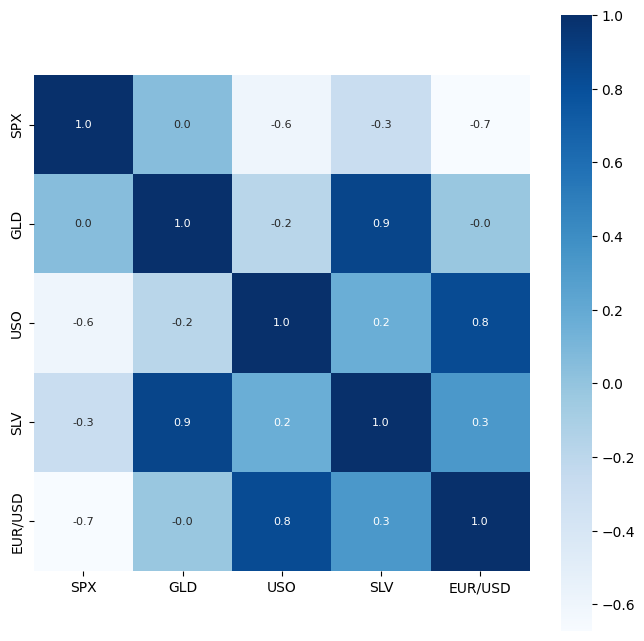

In [45]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True ,square=True, fmt='.1f' , annot=True , annot_kws={'size':8},cmap= 'Blues')

In [46]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


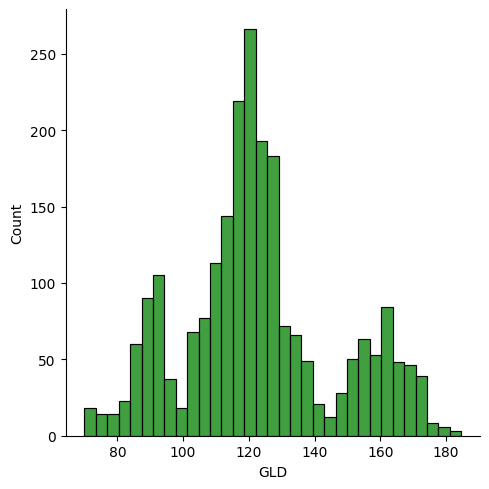

In [82]:
# CHECKING THE DISTRIBUTION OF THE GLD PRICE
sns.displot(gold_dataset['GLD'],color='green')

<Axes: xlabel='GLD', ylabel='Count'>

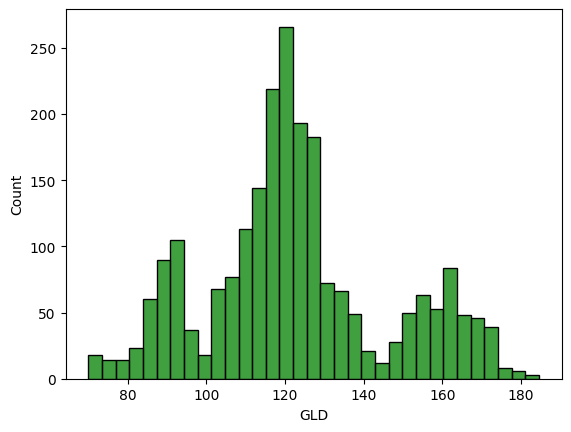

In [83]:
# CHECKING THE DISTRIBUTION OF THE GLD PRICE
sns.histplot(gold_dataset['GLD'],color='green')

Splitting the  Feature and Target

In [48]:
X = gold_dataset.drop(['Date','GLD'], axis=1)
Y = gold_dataset['GLD']

In [49]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [51]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test Data

In [55]:
X_train, X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 2)

In [56]:
print(X.shape , X_train.shape , X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training :
Random Forest Regressor

In [60]:
regressor = RandomForestRegressor(n_estimators=100)

In [62]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [64]:
# prediction on the Test Data
test_data_prediction = regressor.predict(X_test)

In [65]:
print(test_data_prediction)

[168.54179964  81.61369998 115.99030028 127.72930112 120.90250131
 154.57829802 150.43939816 126.11350014 117.5466987  125.98020054
 116.68060087 171.64990093 141.51179901 167.88269815 114.95050033
 117.70950037 137.99390291 170.2135012  159.22450369 157.98669924
 155.05650066 125.05760021 176.43439968 156.97140352 125.28770034
  93.78619991  77.72530044 120.68399985 119.19339987 167.40679986
  88.19310028 125.22420026  91.05620072 117.6910001  121.15029924
 135.87519974 115.49290134 115.45850072 147.67210024 107.33130074
 104.50480234  87.25639806 126.49380019 118.04469999 152.77409871
 119.61389998 108.3438998  108.06689818  93.15410018 127.24009734
  74.88790035 113.65809927 121.37809964 111.37219935 118.91409906
 120.58279954 158.78450007 167.30570145 146.87449673  85.98889859
  94.41600047  86.96769889  90.65890012 118.95560089 126.39780032
 127.66239953 169.63709986 122.34569938 117.4240992   98.67320049
 168.28000109 143.22709858 131.96580242 121.27630218 121.62039974
 119.99680

In [69]:
# R square error
error_square = metrics.r2_score(Y_test , test_data_prediction)
print('R square error : ' , error_square)

R square error :  0.9897177053976927


Compare the Actual values and Predicted values



In [70]:
# converting the y_test into List
Y_test = list(Y_test)

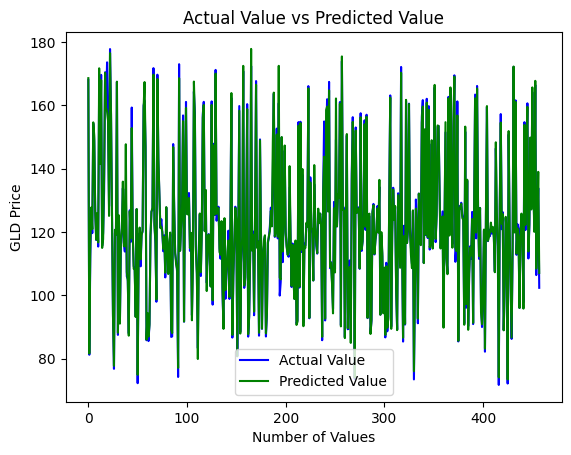

In [79]:
plt.plot(Y_test , color='blue' , label = 'Actual Value')
plt.plot(test_data_prediction,color='green',label = 'Predicted Value')
plt.title('Actual Value vs Predicted Value')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()